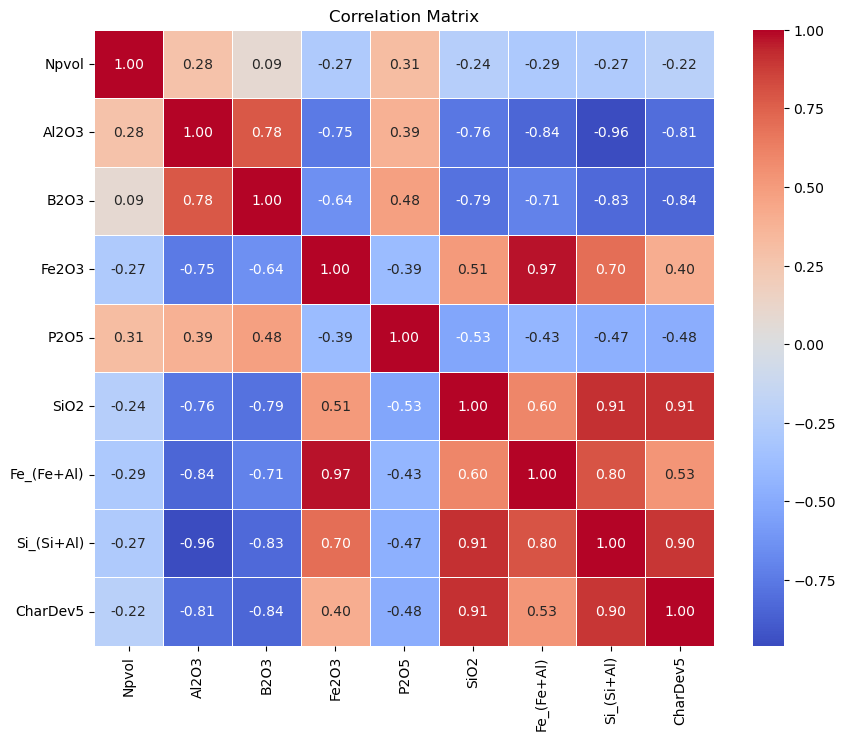

In [246]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your Excel file is named 'your_excel_file.xlsx'
excel_file_path = 'elements.xlsx'
df = pd.read_excel(excel_file_path)

# Convert the DataFrame to a dictionary
data_dict = df.to_dict(orient='list')


df = pd.DataFrame(data_dict)


# Correlation matrix
correlation_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


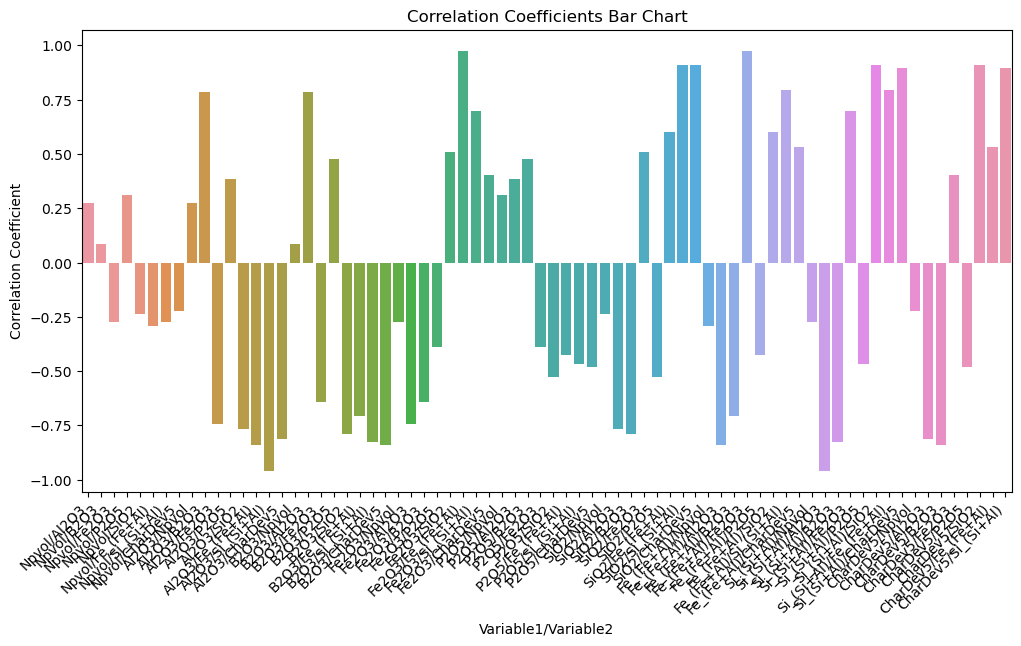

In [247]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your Excel file is named 'elements.xlsx'
excel_file_path = 'elements.xlsx'
df = pd.read_excel(excel_file_path)

# Convert the DataFrame to a dictionary
data_dict = df.to_dict(orient='list')

# Create a new DataFrame
df = pd.DataFrame(data_dict)

# Correlation matrix
correlation_matrix = df.corr()

# Flatten the correlation matrix into a list
correlation_list = correlation_matrix.unstack().reset_index()

# Rename columns for clarity
correlation_list.columns = ['Variable1', 'Variable2', 'Correlation_Coefficient']

# Filter out duplicate rows and remove self-correlations
correlation_list = correlation_list[correlation_list['Variable1'] != correlation_list['Variable2']]

# Combine 'Variable1' and 'Variable2' into a single column
correlation_list['Variable'] = correlation_list['Variable1'] + '/' + correlation_list['Variable2']

# Drop redundant columns
correlation_list = correlation_list[['Variable', 'Correlation_Coefficient']]

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Variable', y='Correlation_Coefficient', data=correlation_list)
plt.title('Correlation Coefficients Bar Chart')
plt.xlabel('Variable1/Variable2')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


# Data Preprocessing

In [248]:
# Standardization by StandardScaler
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Specify the path to your CSV file
csv_file_path = 'Important_features_npvol_3.csv'

# Read the CSV file into a DataFrame
delimiter = ';'
df = pd.read_csv(csv_file_path, sep=delimiter)

# Display the DataFrame
print("Read DataFrame from CSV:")
print(df)

Read DataFrame from CSV:
                        Glass_ID Nepheline Volume  Label      Npvol     Al2O3  \
0                        NP-Li-1            < 10%      0   0.470422  0.144100   
1                   NP-MC-AlLi-1            < 10%      0   0.797137  0.255000   
2                          US-26            < 10%      0   0.900000  0.188291   
3                   NP2 - High B            < 10%      0   0.993750  0.268500   
4                         Hal-15            < 10%      0   1.000000  0.266345   
..                           ...              ...    ...        ...       ...   
149  EWG-OL-06489 Mod 11%B 15%Na            < 70%     60  60.105847  0.300000   
150                 NP-MC-AlNa-1            < 70%     60  60.924355  0.255000   
151                  NP2 - Low B            < 70%     60  62.456653  0.296000   
152               NP-MC-AlLiNa-1            < 70%     60  64.023145  0.311400   
153                  NP-MC-BNa-1            < 70%     60  67.815423  0.285800   

  

In [249]:
# Dimensions of Master Dataset
print('Shape of data= ', df.shape)

Shape of data=  (154, 12)


In [250]:
# Column Names of Dataframe
column_names = df.columns
column_names

Index(['Glass_ID', 'Nepheline Volume', 'Label', 'Npvol', 'Al2O3', 'B2O3',
       'Fe2O3', 'P2O5', 'SiO2', 'Fe_(Fe+Al)', 'Si_(Si+Al)', 'CharDev5'],
      dtype='object')

In [251]:
# Random inspection of the dataset
df[100:110]

,Glass_ID,Nepheline Volume,Label,Npvol,Al2O3,B2O3,Fe2O3,P2O5,SiO2,Fe_(Fe+Al),Si_(Si+Al),CharDev5
100,HLWE-Ana-11(1B-1Li),< 40%,30,38.278000,0.25880,0.1444,0.03410,0.0245,0.28720,0.116422,0.526007,0.656757
101,HLWE-Ana-11(1.5B-1.5Li),< 40%,30,38.347000,0.25880,0.1494,0.03410,0.0245,0.28720,0.116422,0.526007,0.649333
102,NP2-16,< 40%,30,39.000000,0.13610,0.0519,0.14700,0.0000,0.42360,0.519251,0.756834,1.264478
103,NP2-21,< 40%,30,39.000000,0.18000,0.0450,0.05800,0.0000,0.35000,0.243697,0.660377,1.236749
104,HLWE-Ana-13(3Al+2B-5Si),< 40%,30,39.514000,0.24340,0.1637,0.02820,0.0202,0.29060,0.103829,0.544195,0.667586
105,EWG-OL-02463,< 40%,30,39.536290,0.19455,0.0800,0.10000,0.0300,0.20000,0.339501,0.506907,0.533974
106,HLWE-ANa-13(2Na-2Ca),< 50%,40,40.372000,0.21340,0.1437,0.02820,0.0202,0.34060,0.116722,0.614801,0.883987
107,NEPH2-23,< 50%,40,40.372205,0.12828,0.0408,0.10866,0.0000,0.39562,0.458597,0.755144,1.424426
108,EWG-OL-05385 Mod 12%B 17%Na,< 50%,40,40.551411,0.25460,0.1200,0.00000,0.0000,0.24000,0.000000,0.485241,0.640683
109,NE3-27,< 50%,40,40.900000,0.18310,0.0511,0.06840,0.0000,0.39980,0.271968,0.685881,1.321216


In [252]:
# Preview of Dataset
df.head(5)

,Glass_ID,Nepheline Volume,Label,Npvol,Al2O3,B2O3,Fe2O3,P2O5,SiO2,Fe_(Fe+Al),Si_(Si+Al),CharDev5
0,NP-Li-1,< 10%,0,0.470422,0.144100,0.083800,0.104100,0.010508,0.401900,0.419420,0.736081,1.210542
1,NP-MC-AlLi-1,< 10%,0,0.797137,0.255000,0.182300,0.026500,0.007400,0.311200,0.094139,0.549629,0.670979
2,US-26,< 10%,0,0.900000,0.188291,0.106853,0.049990,0.000000,0.380544,0.209795,0.668989,1.102599
3,NP2 - High B,< 10%,0,0.993750,0.268500,0.220000,0.023600,0.006600,0.276500,0.080794,0.507339,0.539934
4,Hal-15,< 10%,0,1.000000,0.266345,0.152110,0.065545,0.011690,0.262895,0.197490,0.496741,0.543171


In [253]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Glass_ID          154 non-null    object 
 1   Nepheline Volume  154 non-null    object 
 2   Label             154 non-null    int64  
 3   Npvol             154 non-null    float64
 4   Al2O3             154 non-null    float64
 5   B2O3              154 non-null    float64
 6   Fe2O3             154 non-null    float64
 7   P2O5              154 non-null    float64
 8   SiO2              154 non-null    float64
 9   Fe_(Fe+Al)        154 non-null    float64
 10  Si_(Si+Al)        154 non-null    float64
 11  CharDev5          154 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.6+ KB


In [254]:
# Remove irrelevant features 'name' and 
# Parameter axis=1 indicates that columns will be dropped
relevant_df = df.drop(['Glass_ID', 'Nepheline Volume'], axis=1)
# View summary of the relevant dataset
relevant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Label       154 non-null    int64  
 1   Npvol       154 non-null    float64
 2   Al2O3       154 non-null    float64
 3   B2O3        154 non-null    float64
 4   Fe2O3       154 non-null    float64
 5   P2O5        154 non-null    float64
 6   SiO2        154 non-null    float64
 7   Fe_(Fe+Al)  154 non-null    float64
 8   Si_(Si+Al)  154 non-null    float64
 9   CharDev5    154 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 12.2 KB


In [255]:
#########################
#########################

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data using StandardScaler
scaled_data = scaler.fit_transform(relevant_df) # = relevant_df#

In [256]:
# Create a new DataFrame with the standardized data
scaled_df = pd.DataFrame(scaled_data, columns=relevant_df.columns)

# Display the standardized dataset
print("\nStandardized dataset:")
print(scaled_df)


Standardized dataset:
        Label     Npvol     Al2O3      B2O3     Fe2O3      P2O5      SiO2  \
0   -1.352110 -1.566125 -0.909397 -0.530289  1.015030  0.126116  0.944549   
1   -1.352110 -1.547903  0.852057  1.411654 -0.879910 -0.198022 -0.435991   
2   -1.352110 -1.542167 -0.207506 -0.075800 -0.306300 -0.969662  0.619487   
3   -1.352110 -1.536938  1.066481  2.154916 -0.950726 -0.281443 -0.964158   
4   -1.352110 -1.536589  1.032253  0.816453  0.073543  0.249320 -1.171239   
..        ...       ...       ...       ...       ...       ...       ...   
149  2.052112  1.759913  1.566804 -0.013752 -1.527022  2.158608 -1.541032   
150  2.052112  1.805564  0.852057  1.208588 -0.916539 -0.239733 -0.705402   
151  2.052112  1.891024  1.503271  0.577703 -0.892119 -0.208450 -0.533405   
152  2.052112  1.978392  1.747873  0.822171 -0.987355 -0.323153 -1.215304   
153  2.052112  2.189898  1.341262  0.577703 -0.914097 -0.239733 -0.693225   

     Fe_(Fe+Al)  Si_(Si+Al)  CharDev5  
0      1.049

# AdaBoost Regressor

In [257]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [258]:
X = scaled_df.drop(['Npvol'], axis=1)
y = scaled_df['Npvol']

# Display X
print("\nX Summary:")
print(X.info())

# Display y
print("\ny Summary:")
print(y.info())

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)


X Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Label       154 non-null    float64
 1   Al2O3       154 non-null    float64
 2   B2O3        154 non-null    float64
 3   Fe2O3       154 non-null    float64
 4   P2O5        154 non-null    float64
 5   SiO2        154 non-null    float64
 6   Fe_(Fe+Al)  154 non-null    float64
 7   Si_(Si+Al)  154 non-null    float64
 8   CharDev5    154 non-null    float64
dtypes: float64(9)
memory usage: 11.0 KB
None

y Summary:
<class 'pandas.core.series.Series'>
RangeIndex: 154 entries, 0 to 153
Series name: Npvol
Non-Null Count  Dtype  
--------------  -----  
154 non-null    float64
dtypes: float64(1)
memory usage: 1.3 KB
None


In [259]:
# Initialize AdaBoostRegressor
ada_regressor = AdaBoostRegressor(n_estimators=50, random_state=42)

# Fit the model
ada_regressor.fit(X_train, y_train)

# Make predictions
y_pred = ada_regressor.predict(X_test)

# Evaluate the model
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate mean and standard deviation of predictions
mean_prediction = np.mean(y_pred)
std_deviation_prediction = np.std(y_pred)

# Print the results
print(f"Mean of Predictions: {mean_prediction}")
print(f"Standard Deviation of Predictions: {std_deviation_prediction}")


Mean Squared Error: 0.02721229669143287
Mean of Predictions: -0.035507150595999896
Standard Deviation of Predictions: 1.021655919102314


# Data Visualization

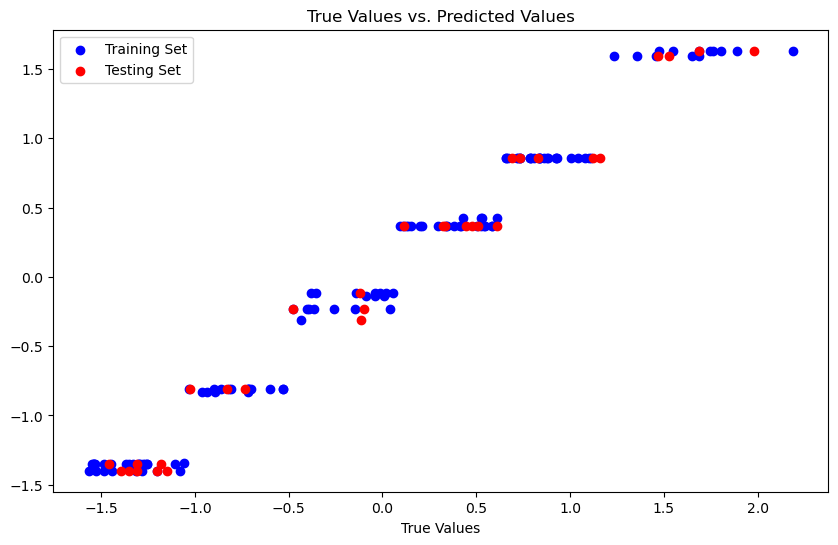

In [260]:
# Make predictions on both training and testing sets
y_train_pred = ada_regressor.predict(X_train)
y_test_pred = ada_regressor.predict(X_test)

# Plot the true values vs. predicted values
plt.figure(figsize=(10, 6))

# Training set
plt.scatter(y_train, y_train_pred, color='blue', label='Training Set')

# Testing set
plt.scatter(y_test, y_test_pred, color='red', label='Testing Set')

plt.title('True Values vs. Predicted Values')
plt.xlabel('True Values')
plt.legend()
plt.show()

# Forward Feature Selection

In [261]:
!pip install mlxtend

In [262]:
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt


# Sequential Forward Feature Selection
sfs = SequentialFeatureSelector(ada_regressor, k_features='best', forward=True, scoring='neg_mean_squared_error', cv=5)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=AdaBoostRegressor(random_state=42),
                          k_features=(1, 9), scoring='neg_mean_squared_error')

In [263]:
# Get the selected feature indices
selected_features = list(sfs.k_feature_idx_)

# Convert selected_features to a NumPy array
selected_features = np.array(selected_features)

In [264]:
# Train the model on the selected features
ada_regressor.fit(X_train[:, selected_features], y_train)

InvalidIndexError: (slice(None, None, None), array([0, 3, 5]))

In [ ]:
# Make predictions on the test set
X_test_selected = X_test[:, selected_features]
y_pred = ada_regressor.predict(X_test_selected)

In [ ]:
# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

# Plot the performance of the model during feature selection
fig = plt.figure(figsize=(12, 6))
k_feat = [len(k) for k in sfs.subsets_]
plt.plot(k_feat, -sfs.k_score_)
plt.xlabel('Number of Features')
plt.ylabel('Negative Mean Squared Error (CV Score)')
plt.title('Sequential Forward Feature Selection with AdaBoost Regressor')
plt.show()